Task 6.6

# Install the Quandl library and register for a Quandl account as described in the Exercise.
Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.
Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.
Create a line chart of your data.
Decompose the data’s components.
Analyze the results from the plot in a markdown cell.
Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.
If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
If your data still isn’t stationary, perform another round of differencing and repeat step 6.
Check your data’s autocorrelations.


In [1]:
conda install quandl

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv(r'C:\Users\admin\OneDrive - Aero Operating LLC\Documents\Career Foundry\Uber Lyft CSV2.csv', index_col = False)

In [4]:
data.head()

,hour,day,month,datetime,pickup,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,weather,humidity,windSpeed
0,9,16,12,2018-12-16,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,0.68,8.66
1,2,27,11,2018-11-27,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,Rain,0.94,11.98
2,1,28,11,2018-11-28,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,Clear,0.75,7.33
3,4,30,11,2018-11-30,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,Clear,0.73,5.28
4,3,29,11,2018-11-29,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,0.70,9.14


In [5]:
data.shape

(60392, 17)

In [6]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'pickup', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'weather', 'humidity', 'windSpeed'],
      dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
# Creating a new dataframe with median housing prices grouped by dates

df = data.groupby('datetime').agg({'price': ['median']})

In [9]:
# Checking headers

df.head()

,price
,median
datetime,
2018-11-26,14.0
2018-11-27,14.0
2018-11-28,13.5
2018-11-29,14.0
2018-11-30,13.5


In [10]:
# Checking data types

df.dtypes

price  median    float64
dtype: object

In [11]:
df

,price
,median
datetime,
2018-11-26,14.0
2018-11-27,14.0
2018-11-28,13.5
2018-11-29,14.0
2018-11-30,13.5
2018-12-01,13.5
2018-12-02,13.5
2018-12-03,13.5


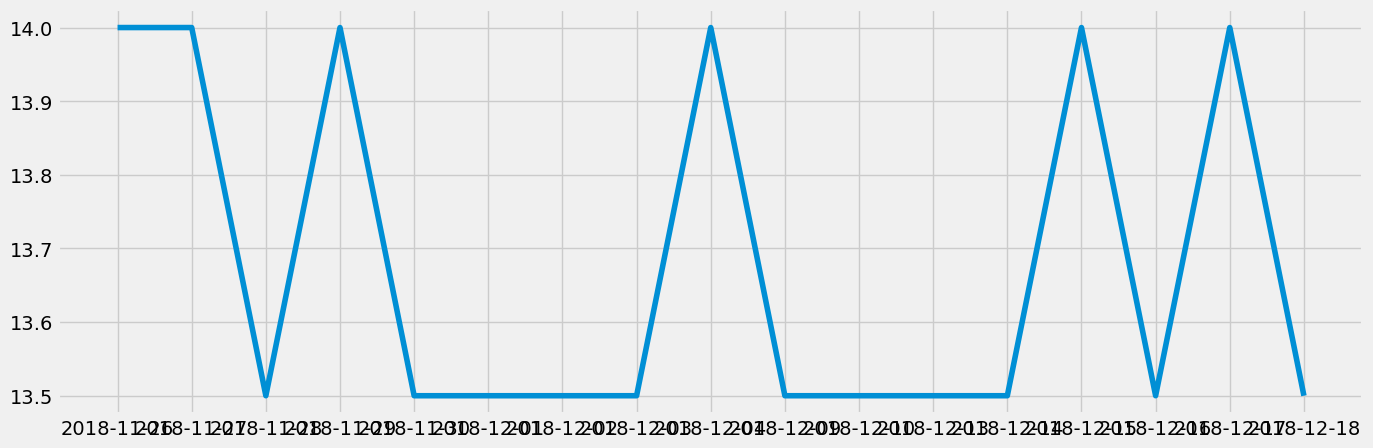

In [12]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [13]:
data_2 = df.reset_index()

In [14]:
data_2.head()

,datetime,price
,,median
0,2018-11-26,14.0
1,2018-11-27,14.0
2,2018-11-28,13.5
3,2018-11-29,14.0
4,2018-11-30,13.5


In [15]:
data_sub = data_2.loc[(data_2['datetime'] >= '2018-11-26') & (data_2['datetime'] < '2018-12-18')]

In [16]:
data_sub.shape

(16, 2)

In [17]:
data_sub.head()

,datetime,price
,,median
0,2018-11-26,14.0
1,2018-11-27,14.0
2,2018-11-28,13.5
3,2018-11-29,14.0
4,2018-11-30,13.5


In [18]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum()

datetime            0
price     median    0
dtype: int64

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

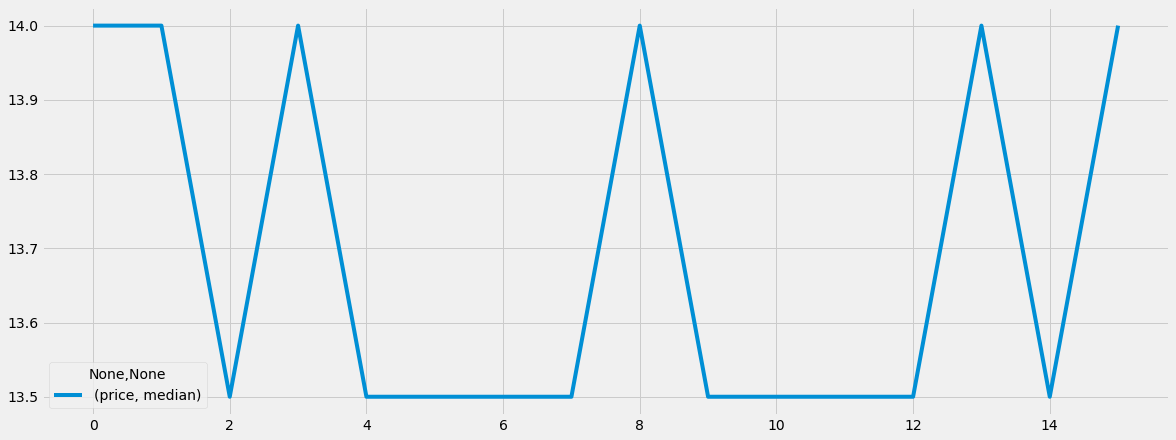

In [20]:
# Plot the separate components

data_sub.plot()
plt.show()

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.984003
p-value                         0.036416
Number of Lags Used             3.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


# As per the Dickey-Fuller test, the p-value is below the .05 threshhold and thus significant! As well, the test statistic is below the 10% Critical Value level thus resulting in the rejection of the Null Hypothesis. This indicates that the data is stationaryand that we can proceed with the forecast

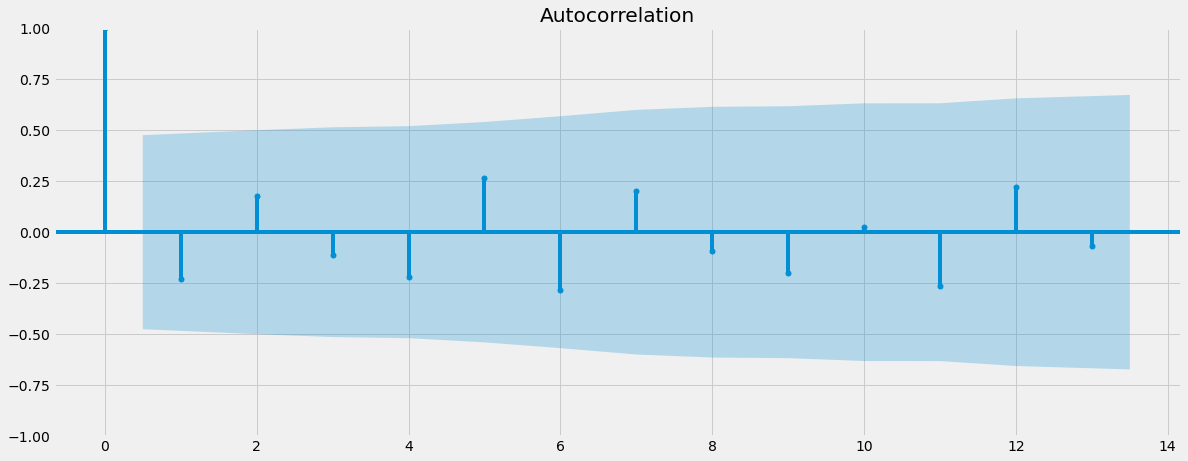

In [24]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

# The Autocorrelation Plot indicates that the stationary is strong as the vertical lines do not go above the confidence interval.

# Although the primary analysis provided strong conclusive results, a secondary analysis was completed to see if there could be an improvement. This second analysis did not provide better insights!

In [26]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [27]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [28]:
data_diff.head()

,price
,median
datetime,
2018-11-27,0.0
2018-11-28,-0.5
2018-11-29,0.5
2018-11-30,-0.5
2018-12-01,0.0


In [29]:
data_diff.columns

MultiIndex([('price', 'median')],
           )

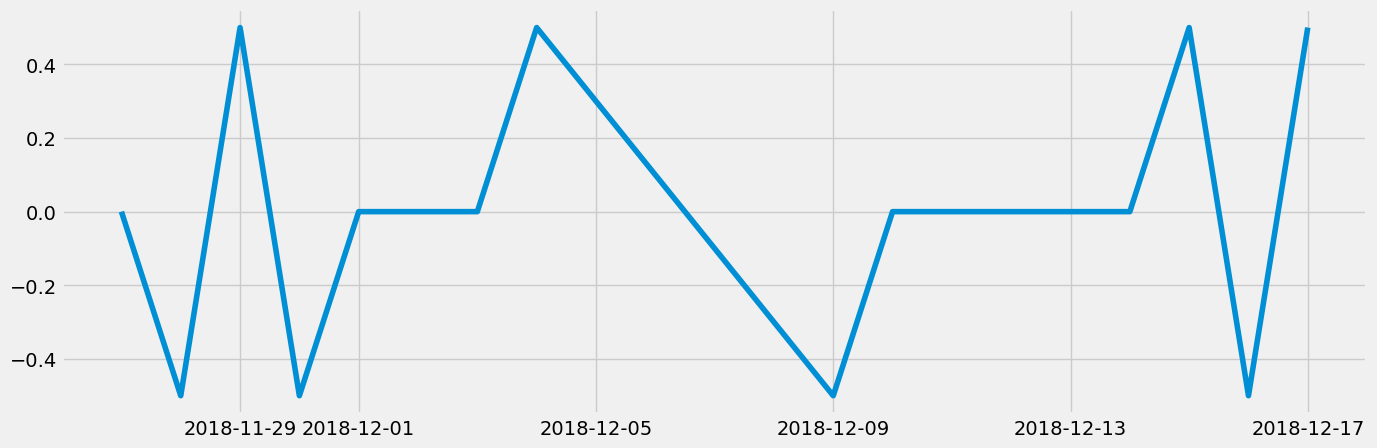

In [59]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [60]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.866537
p-value                         0.049380
Number of Lags Used             3.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


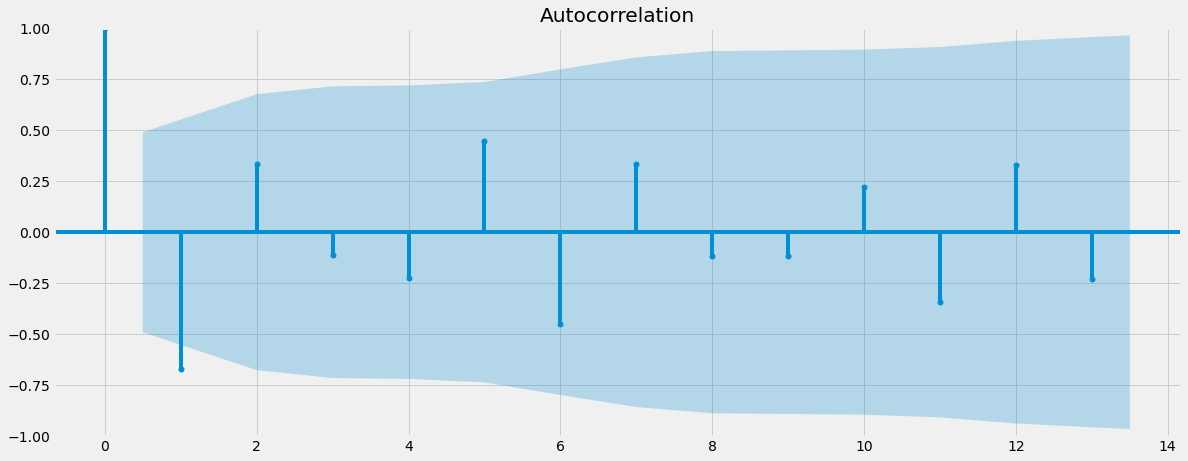

In [30]:
plot_acf(data_diff)
plt.show()